<a href="https://colab.research.google.com/github/queleandrade/Diagrama_do_Bode/blob/main/Diagrama_do_bode_com_assintotas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Instalando as bibliotecas necessárias**

In [3]:
# bibliotecas necessárias
!pip install numpy matplotlib scipy


## **Importando as bibliotecas e definir a função de transferência**

In [9]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Função de transferência do sistema G(s) = 1 / (s^2 + s + 1)
numerador = [1]
denominador = [1, 1, 1]
sistema = signal.TransferFunction(numerador, denominador)


## **Calculando a resposta em frequência**

In [10]:

frequencia, magnitude, fase = signal.bode(sistema)


## **Plotando o diagrama de Bode**

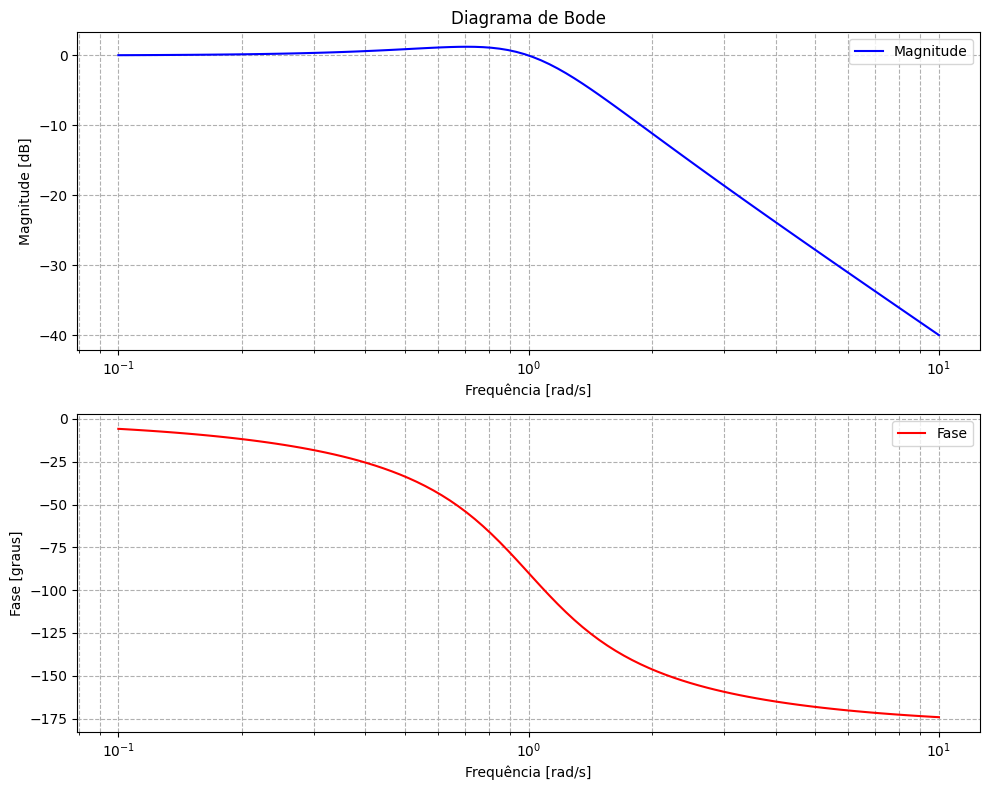

In [11]:
# Plotar
plt.figure(figsize=(10, 8))

# Diagrama de magnitude
plt.subplot(2, 1, 1)
plt.semilogx(frequencia, magnitude, 'b', label='Magnitude')
plt.grid(True, which="both", ls="--")
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Diagrama de Bode')
plt.legend()

# Diagrama de fase
plt.subplot(2, 1, 2)
plt.semilogx(frequencia, fase, 'r', label='Fase')
plt.grid(True, which="both", ls="--")
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Fase [graus]')
plt.legend()

plt.tight_layout()
plt.show()



## **Definindo função para calcular assíntotas**

In [12]:
# Definir função para calcular as assíntotas de magnitude
def assintotas(frequencia, numerador, denominador):
    zeros = np.roots(numerador)
    polos = np.roots(denominador)
    assintota_baixa_freq = 20 * np.log10(abs(numerador[-1] / denominador[-1]))
    inclinação_assintota_alta_freq = 20 * (len(zeros) - len(polos))

    linha_assintota_baixa_freq = assintota_baixa_freq * np.ones_like(frequencia)
    linha_assintota_alta_freq = assintota_baixa_freq + inclinação_assintota_alta_freq * np.log10(frequencia / frequencia[0])

    return linha_assintota_baixa_freq, linha_assintota_alta_freq



## **Calculando assíntotas e plotar junto com o diagrama de Bode**

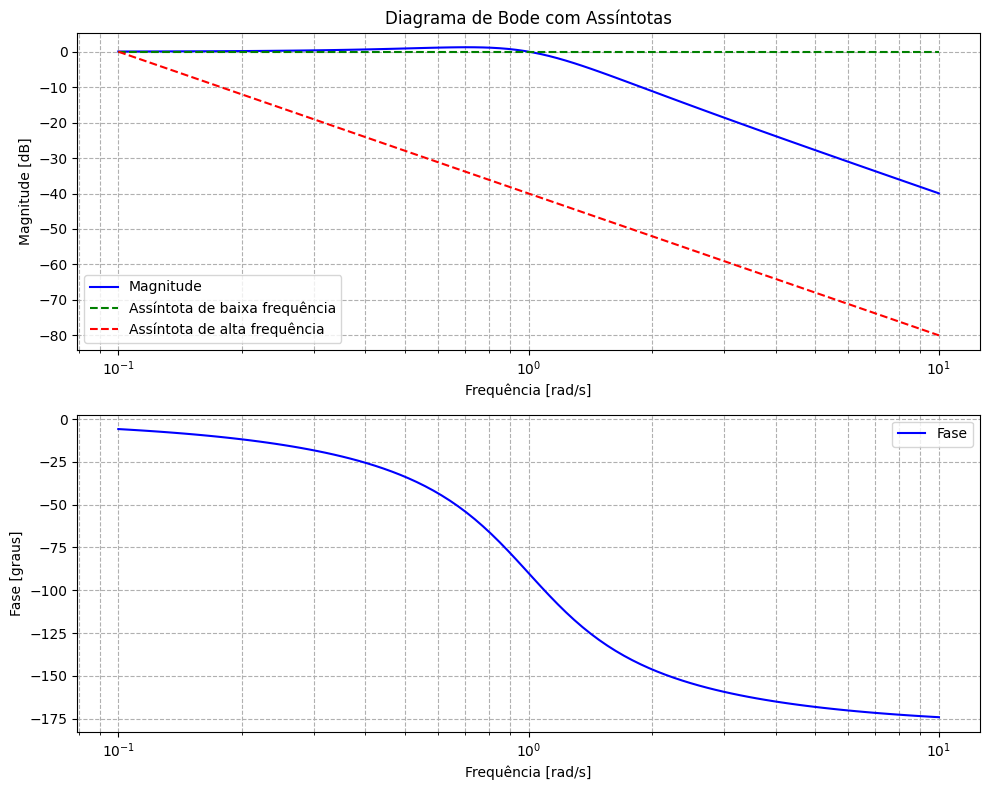

In [14]:
# Calcular as assíntotas
assintota_baixa_freq, assintota_alta_freq = assintotas(frequencia, numerador, denominador)

# Plotar o diagrama de Bode com assíntotas
plt.figure(figsize=(10, 8))

# Diagrama de magnitude
plt.subplot(2, 1, 1)
plt.semilogx(frequencia, magnitude, 'b', label='Magnitude')
plt.plot(frequencia, assintota_baixa_freq, 'g--', label='Assíntota de baixa frequência')
plt.plot(frequencia, assintota_alta_freq, 'r--', label='Assíntota de alta frequência')
plt.grid(True, which="both", ls="--")
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Diagrama de Bode com Assíntotas')
plt.legend()

# Diagrama de fase
plt.subplot(2, 1, 2)
plt.semilogx(frequencia, fase, 'b', label='Fase')
plt.grid(True, which="both", ls="--")
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Fase [graus]')
plt.legend()

plt.tight_layout()
plt.show()

